In [95]:
import reshape
import matlab.engine
import scipy.io
import pandas as pd
import numpy as np
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import colors as mcolors
import seaborn as sns
%matplotlib inline
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
Parcel_params = reshape.loadParcelParams('Gordon333',thisDir+'data/Parcel_info/')
roi_sort = np.squeeze(Parcel_params['roi_sort'])
fileFC=scipy.io.loadmat(thisDir+'data/mvpa_data/mem/MSC06_memMrest_parcel_corrmat.mat')
#Convert to numpy array
fileFC=np.array(fileFC['parcel_corrmat'])

restFC=scipy.io.loadmat(thisDir+'data/mvpa_data/mem/MSC06_parcel_corrmat.mat')
#Convert to numpy array
restFC=np.array(restFC['parcel_corrmat'])

fileSS=scipy.io.loadmat(thisDir+'data/mvpa_data/mem/MSC06_motMrest_parcel_corrmat.mat')
SS=np.array(fileSS['parcel_corrmat'])


fileDS=scipy.io.loadmat(thisDir+'data/mvpa_data/mem/MSC03_memMrest_parcel_corrmat.mat')
DS=np.array(fileDS['parcel_corrmat'])

fileBS=scipy.io.loadmat(thisDir+'data/mvpa_data/mem/MSC03_motMrest_parcel_corrmat.mat')
BS=np.array(fileBS['parcel_corrmat'])


avg_task=np.mean(fileFC,axis=2)
avg_rest=np.mean(restFC,axis=2)




#Make color palette
MSCList=['1','2','3','4','5','6','7','10']
MSC_colors=np.array([[0, 0, 0],[0.9, 0.9, 0],[0, 1, 0],[1, 0, 0],[0, 0, 1],[0.2, 1, 1],[1, 0, 1],[1, 0.5, 0]])
MSCdict=dict(zip(MSCList, [mcolors.to_rgba(m) for m in MSC_colors]))
mcolors.get_named_colors_mapping().update(MSCdict)

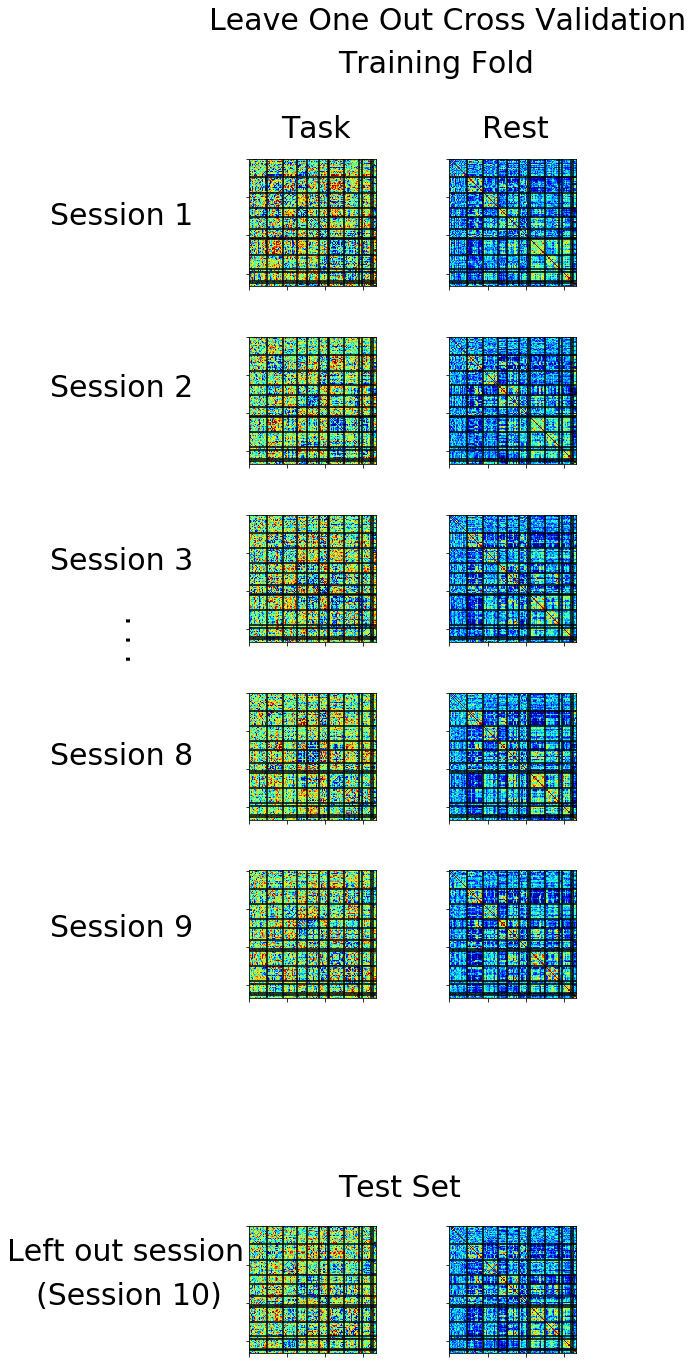

In [99]:
fig=plt.figure(figsize=(20,30), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=10, ncols=4)#, wspace=0.9, hspace=0.1)
gs.update(wspace=0.05, hspace=0.4, left = 0.15, right = 0.7, bottom = 0.1, top = 0.9) 
fig.text(.14, .96, 'Leave One Out Cross Validation',fontsize=30)
#fig.text(.2, .96, 'Same Subject',fontsize=40)
fig.text(.23, .94, 'Training Fold',fontsize=30)
fig.text(.19, .91, 'Task',fontsize=30)
fig.text(.33, .91, 'Rest',fontsize=30)
#fig.text(.2, .64, 'Fold 1',fontsize=40)
#fig.text(.3,.44, 'Same Subject', fontsize=40)
fig.text(.23, .42, 'Test Set',fontsize=30)
#fig.text(.45, .5, 'Task',fontsize=30)
#fig.text(.6, .5, 'Rest',fontsize=30)
#plt.arrow(.23, .62, .15, 0, width = 0.01)  
fig.text(.03, .87, 'Session 1',fontsize=30)
fig.text(.03, .79, 'Session 2',fontsize=30)
fig.text(.03, .71, 'Session 3',fontsize=30)
fig.text(.03, .62, 'Session 8',fontsize=30)
fig.text(.03, .54, 'Session 9',fontsize=30)
fig.text(.07, .67, '. . .',fontsize=30,rotation='vertical')
fig.text(.00001, .39, 'Left out session',fontsize=30)
fig.text(.02, .37,'(Session 10)',fontsize=30)

for i in range(6):
    corrmat=fileFC[:,:,i]
    if i != 5:
    # main figure plotting
        ax=fig.add_subplot(gs[i,0])
        im = ax.imshow(corrmat[roi_sort,:][:,roi_sort],cmap="jet",vmin=-.4,vmax=.4,interpolation='none')
        cbar=plt.colorbar(im)

        # add some lines between networks
        for tr in Parcel_params['transitions']:
            ax.axhline(tr,0,Parcel_params['num_rois'],color='k')
            ax.axvline(tr,0,Parcel_params['num_rois'],color='k')
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        cbar.remove()
        
    else:
        ax=fig.add_subplot(gs[6,0])
        im = ax.imshow(corrmat[roi_sort,:][:,roi_sort],cmap="jet",vmin=-.4,vmax=.4,interpolation='none')
        cbar=plt.colorbar(im)

        # add some lines between networks
        for tr in Parcel_params['transitions']:
            ax.axhline(tr,0,Parcel_params['num_rois'],color='k')
            ax.axvline(tr,0,Parcel_params['num_rois'],color='k')
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        cbar.remove()
for i in range(6):
    corrmat=restFC[:,:,i]
    if i!=5:
        # main figure plotting
        ax=fig.add_subplot(gs[i,1])
        im = ax.imshow(corrmat[roi_sort,:][:,roi_sort],cmap='jet',vmin=-.4,vmax=1, interpolation='none')
        cbar=plt.colorbar(im)

        # add some lines between networks
        for tr in Parcel_params['transitions']:
            ax.axhline(tr,0,Parcel_params['num_rois'],color='k')
            ax.axvline(tr,0,Parcel_params['num_rois'],color='k')
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        cbar.remove()
    else:
        ax=fig.add_subplot(gs[6,1])
        im = ax.imshow(corrmat[roi_sort,:][:,roi_sort],cmap='jet',vmin=-.4,vmax=1, interpolation='none')
        cbar=plt.colorbar(im)

        # add some lines between networks
        for tr in Parcel_params['transitions']:
            ax.axhline(tr,0,Parcel_params['num_rois'],color='k')
            ax.axvline(tr,0,Parcel_params['num_rois'],color='k')
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        cbar.remove()

plt.savefig(thisDir+'output/FigsFinal/CrossVal_example.png', bbox_inches='tight')




In [3]:
#Permutation different sub compared to same sub using all data for training
import SSmOS
#All tasks
SSmOS.classifyScores()